# **Controlled Parametrized Quantum Circuit**
### Resume: 
Example using a controlledPQC

## References
https://www.tensorflow.org/quantum/api_docs/python/tfq/layers/ControlledPQC

## Other examples
There is another example in the 'Hello, many worlds' or the file TFQ-Basics.



---

## Installation

In [ ]:
%%capture
!pip install -q tensorflow==2.5.1
!pip install -q -U tensorflow-quantum
!pip install -q -U tfq-nightly
import importlib, pkg_resources
importlib.reload(pkg_resources)

In [ ]:
!pip show tensorflow
!pip show tensorflow-quantum
!pip show tfq-nightly

Name: tensorflow
Version: 2.5.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-nightly, google-pasta, astunparse, tensorflow-estimator, gast, tensorboard, keras-preprocessing, typing-extensions, opt-einsum, grpcio, termcolor, flatbuffers, wheel, absl-py, numpy, h5py, six, wrapt, protobuf
Required-by: kapre
Name: tensorflow-quantum
Version: 0.5.1
Summary: TensorFlow Quantum is a library for hybrid quantum-classical machine learning.
Home-page: https://github.com/tensorflow/quantum/
Author: Google Inc.
Author-email: no-reply@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: google-auth, protobuf, sympy, cirq, google-api-core, googleapis-common-protos
Required-by: 
Name: tfq-nightly
Version: 0.6.0.dev20210918
Summary: TensorFlow Quantum is

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit



---

## Circuit using ControlledPQC

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


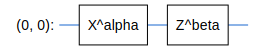

In [ ]:
# Just one bit
bit = cirq.GridQubit(0, 0)  
# Lets create the circuit

model = cirq.Circuit(
    cirq.X(bit) ** sympy.Symbol('alpha'),
    cirq.Z(bit) ** sympy.Symbol('beta')
)

SVGCircuit(model)

In [ ]:
# Lets create the ControlledPQC layer.
outputs = tfq.layers.ControlledPQC(
    model,        # Circuit to use
    cirq.Z(bit))  # operator to apply to measure. In this case we measure in Z.

# This is the input quantum circuit.
quantum_data = tfq.convert_to_tensor([
    cirq.Circuit(),
    cirq.Circuit(cirq.X(bit))
])
# This is are the values of the parameters to reaplace (alpha and beta).
model_params = tf.convert_to_tensor([[0.5, 0.5], [0.25, 0.75]])

# The ControlledPQC has as input [(None,),(None,2)]:
#   - The (None,): It is the qubits inputs.
#   - The (None,2): The parameter to control. In this case, alpha and beta.
res = outputs([quantum_data, model_params])
print(res)

tf.Tensor(
[[ 0.       ]
 [-0.7071067]], shape=(2, 1), dtype=float32)


In [ ]:
outputs = tfq.layers.ControlledPQC(
    model,
    [cirq.Z(bit), cirq.X(bit), cirq.Y(bit)],  # Now we measure in the 3 axis
    repetitions=5000)                         # To average

quantum_data = tfq.convert_to_tensor([
    cirq.Circuit(),
    cirq.Circuit(cirq.X(bit))
])

model_params = tf.convert_to_tensor([[0.5, 0.5], [0.25, 0.75]])

with tf.GradientTape() as g:
    g.watch(model_params)
    res = outputs([quantum_data, model_params])

print("Res = ", res)

# We calculate the gradient
grads = g.gradient(res, model_params)
print("Gradients = ",grads)

Res =  tf.Tensor(
[[ 0.0224  1.     -0.0112]
 [-0.7044 -0.494  -0.4872]], shape=(2, 3), dtype=float32)
Gradients =  tf.Tensor(
[[-3.1145751   3.1409645 ]
 [-0.95441604  0.04021227]], shape=(2, 2), dtype=float32)
